In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv('predictiontraining(with labels).csv')
pr = pd.read_csv('predict_data.csv')

In [3]:
df['Gender'].value_counts()

male       42758
female     27170
other      27060
unknown     6849
0            724
Name: Gender, dtype: int64

In [4]:
df.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


In [5]:
df = df.dropna(subset = ['University Degree', 'Profession', 'Gender'])

In [6]:
pr.shape

(73230, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97414 entries, 0 to 111992
Data columns (total 12 columns):
Instance             97414 non-null int64
Year of Record       97034 non-null float64
Gender               97414 non-null object
Age                  96984 non-null float64
Country              97414 non-null object
Size of City         97414 non-null int64
Profession           97414 non-null object
University Degree    97414 non-null object
Wears Glasses        97414 non-null int64
Hair Color           91151 non-null object
Body Height [cm]     97414 non-null int64
Income in EUR        97414 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.7+ MB


In [8]:
print(df['University Degree'].unique())
print(df['Gender'].unique())

['Bachelor' 'Master' 'PhD' 'No' '0']
['0' 'other' 'female' 'male' 'unknown']


In [9]:
df['University Degree'] = df['University Degree'].replace(["0", "No"], "None")
df['Gender'] = df['Gender'].replace("0", "unknown")
df.head()

pr['University Degree'] = pr['University Degree'].replace(["0", "No"], "None")
pr['Gender'] = pr['Gender'].replace("0", "unknown")
pr.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,unknown,29.0,Uruguay,1494132,occupational therapist,None,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,None,0,Red,191,NaN


In [10]:
df = df.drop(['Wears Glasses', 'Hair Color', 'Body Height [cm]'], axis=1)
df.isnull().sum()

pr = pr.drop(['Wears Glasses', 'Hair Color', 'Body Height [cm]', 'Income'], axis=1)

In [11]:
cat = ['Gender', 'Profession', 'Country', 'University Degree']
df[cat] = df[cat].astype('category')
df_dummy = pd.get_dummies(df[cat], drop_first = True)
df = df.drop(cat, axis=1)
df = pd.concat([df, df_dummy], axis=1)
df.head()

pr[cat] = pr[cat].astype('category')
pr_dummy = pd.get_dummies(pr[cat], drop_first = True)
pr = pr.drop(cat, axis=1)
pr = pd.concat([pr, pr_dummy], axis=1)

In [12]:
from sklearn.impute import SimpleImputer
num = ['Year of Record', 'Age', 'Size of City']
df[num] = df[num].fillna(df.median())
pr[num] = pr[num].fillna(pr.median())

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[num] = scale.fit_transform(df[num])
pr[num] = scale.fit_transform(pr[num])

In [53]:
from sklearn.model_selection import train_test_split

#X = df.drop('Income in EUR', axis=1)
#X = X.iloc[:, 0:1490]
cols = ['Year of Record', 'Age', 'Size of City']
X = df[cols]
y = df['Income in EUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.06123002761131324

In [55]:
X_pred = pr[cols]
y_pred = model.predict(X_pred)

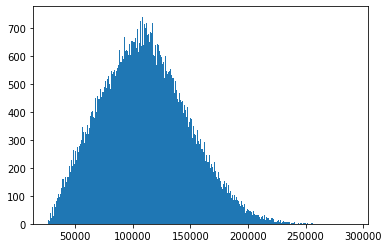

In [56]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=300)
plt.show()

In [57]:
submit = pd.read_csv('submit.csv')
submit['Income'] = y_pred
submit.to_csv('submit.csv', index=False)